In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import os

In [4]:
#get address such as C:\\(folder with you notebook)
dir = os.path.abspath(os.curdir)
# i suppose what your image folders placed in datasets directory 
data_dir=("/datasets")

In [5]:
print(dir)

/home/ubuntu/busstop_project/parsers/traffic


In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/home/ubuntu/busstop_project/parsers/traffic/datasets',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1100 files belonging to 11 classes.
Using 880 files for training.


2024-03-13 20:25:46.178725: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2024-03-13 20:25:46.380839: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-13 20:25:46.383990: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:05.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.56GiB deviceMemoryBandwidth: 298.08GiB/s
2024-03-13 20:25:46.384063: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2024-03-13 20:25:47.649115: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2024-03-13 20:25:47.851040: I tensorflow/stream_executor/platform/default/d

In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/home/ubuntu/busstop_project/parsers/traffic/datasets',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1100 files belonging to 11 classes.
Using 220 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']


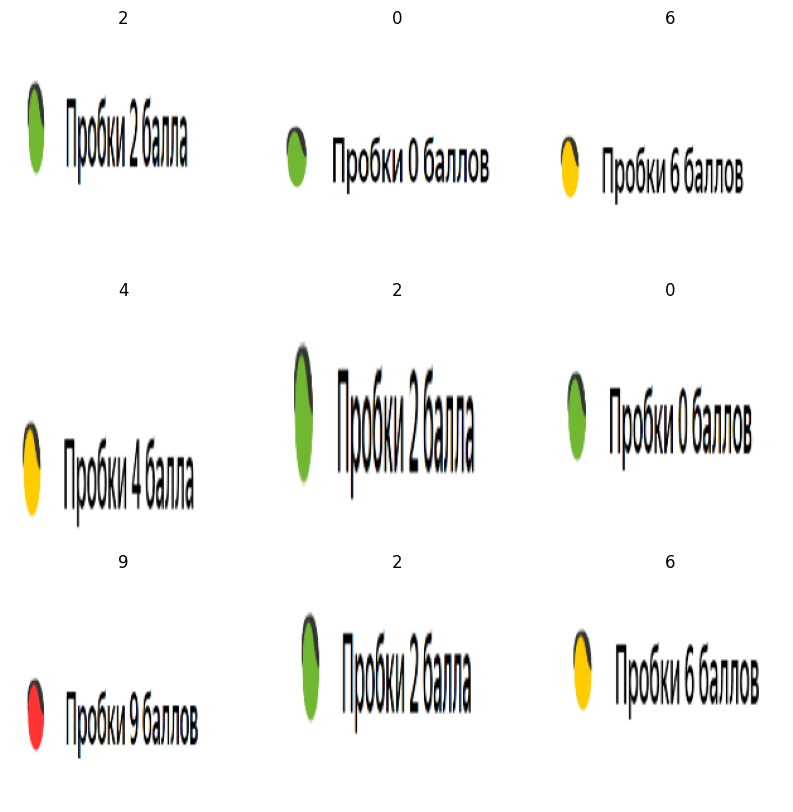

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [14]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [15]:
num_classes = len(class_names)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [18]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


28/28 [==============================] - 14s 487ms/step - loss: 2.7634 - accuracy: 0.1023 - val_loss: 2.3511 - val_accuracy: 0.1227
Epoch 2/15
28/28 [==============================] - 9s 316ms/step - loss: 2.0495 - accuracy: 0.2045 - val_loss: 1.7422 - val_accuracy: 0.2545
Epoch 3/15
28/28 [==============================] - 9s 316ms/step - loss: 1.4777 - accuracy: 0.3898 - val_loss: 1.4599 - val_accuracy: 0.3955
Epoch 4/15
28/28 [==============================] - 9s 306ms/step - loss: 1.2447 - accuracy: 0.4466 - val_loss: 1.3873 - val_accuracy: 0.3773
Epoch 5/15
28/28 [==============================] - 9s 309ms/step - loss: 1.1336 - accuracy: 0.4955 - val_loss: 1.3393 - val_accuracy: 0.4409
Epoch 6/15
28/28 [==============================] - 9s 307ms/step - loss: 0.9473 - accuracy: 0.5830 - val_loss: 1.0773 - val_accuracy: 0.5682
Epoch 7/15
28/28 [==============================] - 9s 304ms/step - loss: 0.7620 - accuracy: 0.6761 - val_loss: 1.0960 - val_accuracy: 0.5227
Epoch 8/15
28/28

In [19]:
path='Weights_folder/Weights'
model.save_weights(path)

In [20]:
model.save('gfgModel.h5')

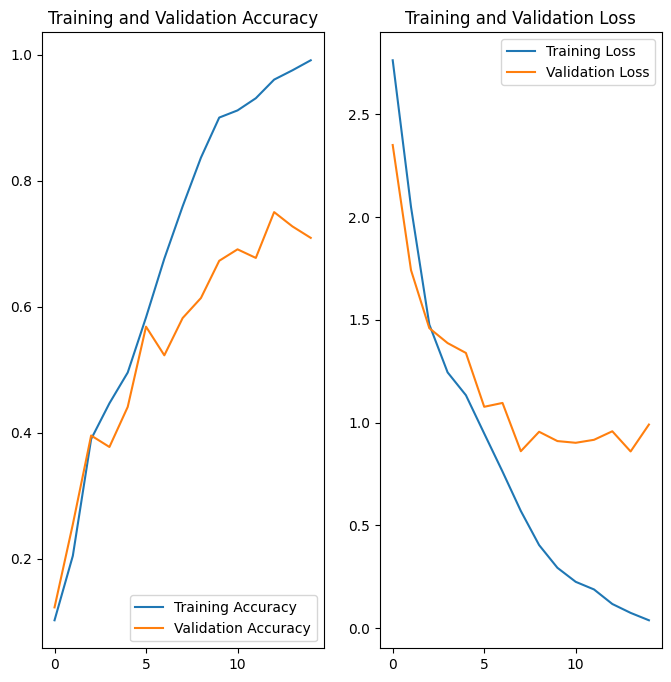

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
from tensorflow import keras

In [23]:
from keras.preprocessing import image

Using TensorFlow backend.


In [24]:
img = image.load_img  (
    'croped_scr.png', target_size=(img_height, img_width)
)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 0 with a 93.46 percent confidence.


In [25]:
import cv2

In [26]:
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver import ChromeOptions
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
from time import sleep
from tqdm import tqdm

In [27]:
from selenium import webdriver
from selenium.webdriver import FirefoxOptions

opts = FirefoxOptions()
opts.add_argument("--headless")
driver = webdriver.Firefox(options=opts)

In [28]:
from selenium.webdriver.common.by import By

In [29]:
driver.get("https://yandex.ru/maps/65/novosibirsk/probki/?ll=82.920430%2C55.030199&source=traffic&z=12")

In [30]:
sleep(5)
driver.save_screenshot('screenie.png')

True

In [31]:
img = cv2.imread("screenie.png")
crop_img = img[120:170, 0:200]
#cv2.imshow("cropped", crop_img)
#cv2.waitKey(0)
cv2.imwrite("croped_scr.png", crop_img)

True

In [32]:
img = image.load_img  (
    'croped_scr.png', target_size=(img_height, img_width)
)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 0 with a 93.46 percent confidence.
